In [87]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely.geometry import Point, LineString, shape
import shapely

In [88]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)

In [89]:
df =pd.read_excel(main_folder_path+"\\data\\BMMS_assig1.xlsx")

In [90]:
df

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,19.50,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.702902,90.450422,bcs1
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.40,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693809,90.478834,bcs1
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.704339,90.519002,road_precise
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,12.20,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699957,90.530815,bcs1
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.20,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699897,90.530895,bcs1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272,Z1705,5.828,Slab Culvert,LRP005d,BASHRA-1- SLAB CULVERT,1.50,D,113984,Baharchhara-Beri Band Road (Kazi Basirullah Mi...,5.828,4.00,1975.0,1.0,Chittagong,Chittagong,Dohazari,Dohazari,22.063639,91.882667,bcs1
18273,Z3008,0.369,Slab Culvert,LRPSa,MIRDABARI SLUB CULVERT,1.70,C,107739,Board Bazar-Zugitalla-Gazipur Road,0.369,5.66,1964.0,1.0,Dhaka,Dhaka,Gazipur,Joydepur-1,23.946450,90.385887,bcs1
18274,Z3008,1.652,Slab Culvert,LRP002a,DAKINAGOR SLAB COMPUTER,7.90,C,107742,Board Bazar-Zugitalla-Gazipur Road,1.652,4.35,1992.0,1.0,Dhaka,Dhaka,Gazipur,Joydepur-1,23.953334,90.394380,bcs1
18275,R201,0.264,Slab Culvert,LRPSa,TARABO CULVERT,3.30,D,113082,Tarabo-Demraghat Road,0.264,10.95,1964.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.724098,90.511130,bcs1


In [91]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

In [92]:
gdf

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,...,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc,geometry
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.800,...,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.702902,90.450422,bcs1,POINT (90.45042 23.70290)
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,...,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693809,90.478834,bcs1,POINT (90.47883 23.69381)
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,...,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.704339,90.519002,road_precise,POINT (90.51900 23.70434)
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.880,...,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699957,90.530815,bcs1,POINT (90.53082 23.69996)
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,...,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699897,90.530895,bcs1,POINT (90.53090 23.69990)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272,Z1705,5.828,Slab Culvert,LRP005d,BASHRA-1- SLAB CULVERT,1.50,D,113984,Baharchhara-Beri Band Road (Kazi Basirullah Mi...,5.828,...,1975.0,1.0,Chittagong,Chittagong,Dohazari,Dohazari,22.063639,91.882667,bcs1,POINT (91.88267 22.06364)
18273,Z3008,0.369,Slab Culvert,LRPSa,MIRDABARI SLUB CULVERT,1.70,C,107739,Board Bazar-Zugitalla-Gazipur Road,0.369,...,1964.0,1.0,Dhaka,Dhaka,Gazipur,Joydepur-1,23.946450,90.385887,bcs1,POINT (90.38589 23.94645)
18274,Z3008,1.652,Slab Culvert,LRP002a,DAKINAGOR SLAB COMPUTER,7.90,C,107742,Board Bazar-Zugitalla-Gazipur Road,1.652,...,1992.0,1.0,Dhaka,Dhaka,Gazipur,Joydepur-1,23.953334,90.394380,bcs1,POINT (90.39438 23.95333)
18275,R201,0.264,Slab Culvert,LRPSa,TARABO CULVERT,3.30,D,113082,Tarabo-Demraghat Road,0.264,...,1964.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.724098,90.511130,bcs1,POINT (90.51113 23.72410)


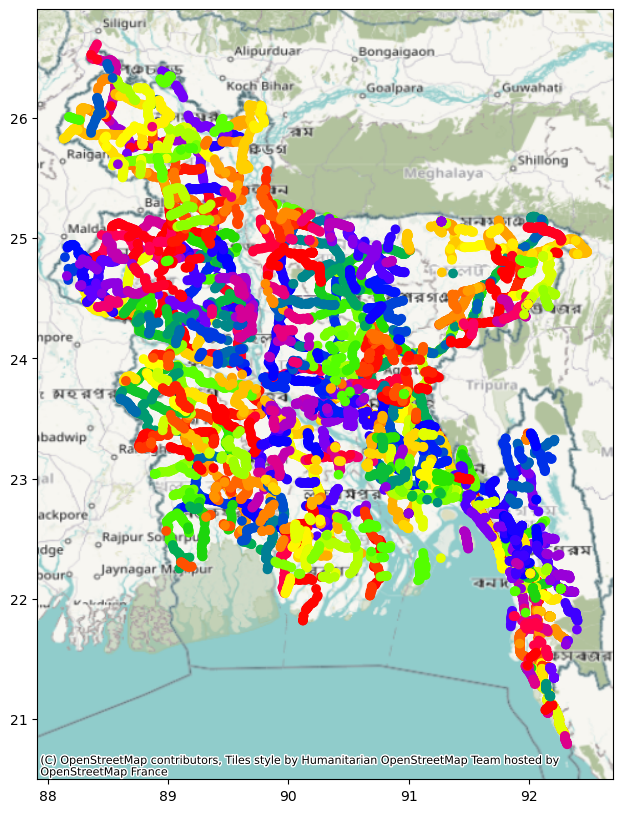

In [93]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

gdf.plot(ax=ax,cmap="prism")
cx.add_basemap(ax,crs="EPSG:4326")

In [94]:
road_names =gdf["road"].unique()
# print(road_names)
line_dict = {}
for road_name in road_names:
    
    bridges_road = gdf[gdf["road"] == road_name]
    # bridges_road=bridges_road.sort_values(by=['km'])
    if len(bridges_road["geometry"]) >= 2:
        line_dict[road_name] =LineString(bridges_road["geometry"])
    

gseries =gpd.GeoSeries(line_dict.values(), index=line_dict.keys(), crs=4326)
    

<Axes: >

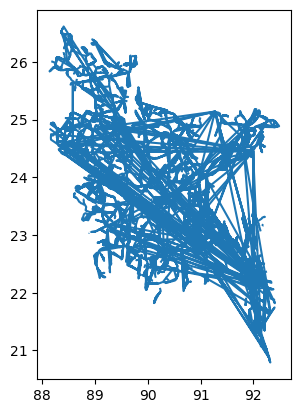

In [95]:
gseries.plot()

In [96]:
gseries["N1"].intersection(gseries["N2"])

In [112]:
Intersecting =[line for line in gseries if gseries["N1"].intersects(line)]

In [113]:
intersections =gseries["N1"].intersection(Intersecting)

<Axes: >

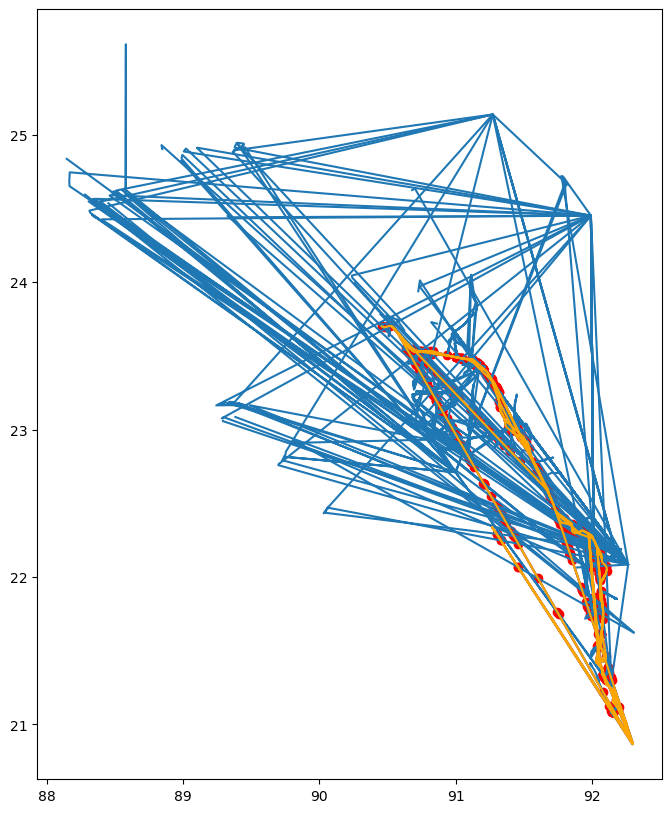

In [129]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(intersections, crs=4326).plot(ax=ax,color="red")
gpd.GeoSeries(Intersecting, crs=4326).plot(ax=ax)
gpd.GeoSeries(gseries["N1"],crs=4326).plot(ax=ax,color="orange")